(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.3503 - val_loss: 0.2696
Epoch 2/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2614 - val_loss: 0.2494
Epoch 3/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2384 - val_loss: 0.2255
Epoch 4/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2180 - val_loss: 0.2082
Epoch 5/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2034 - val_loss: 0.1958
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1924 - val_loss: 0.1863
Epoch 7/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.1839 - val_loss: 0.1789
Epoch 8/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.1773 - val_loss: 0.1729
Epoch 9/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.171

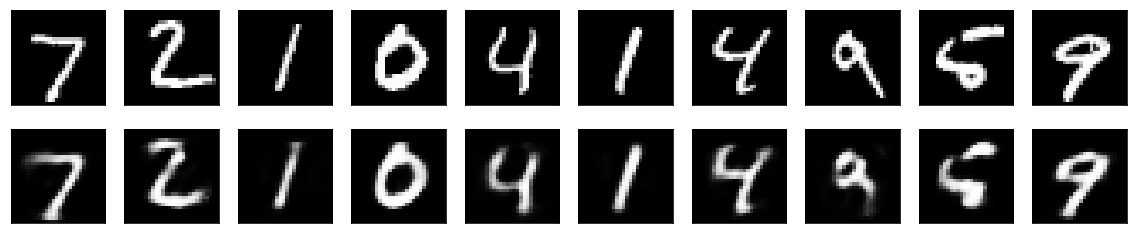

In [6]:
from keras.layers import Input, Dense
from keras.models import Model
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()